### Import Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

### Read Data

In [3]:
# Load raw dataset
df = pd.read_csv('/content/drive/MyDrive/data/Employee.csv')

# head
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
# tail
df.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [5]:
# shape
df.shape

(4653, 9)

In [7]:
# describe
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
# Any null value
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [37]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

### Exploratory Data Analysis(EDA)

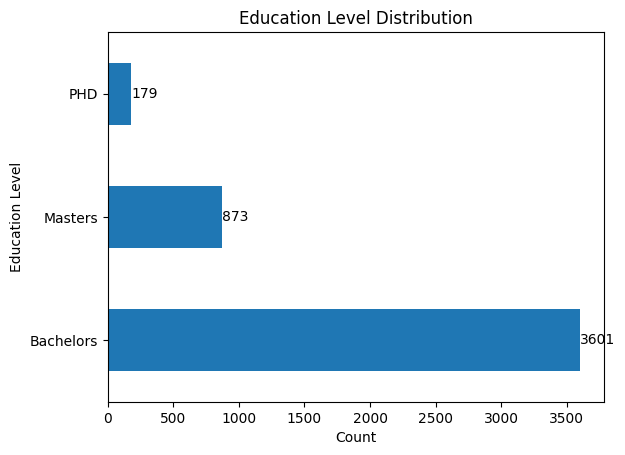

In [17]:
# Assuming df is your DataFrame and 'Education' is a column in it
education_counts = df['Education'].value_counts()

# Create a horizontal bar chart
ax = education_counts.plot(kind='barh')

# Add labels to the bars
for i, count in enumerate(education_counts):
    ax.text(count, i, str(count), va='center')

# Set axis labels and the title
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Education Level Distribution')

# Show the plot
plt.show()

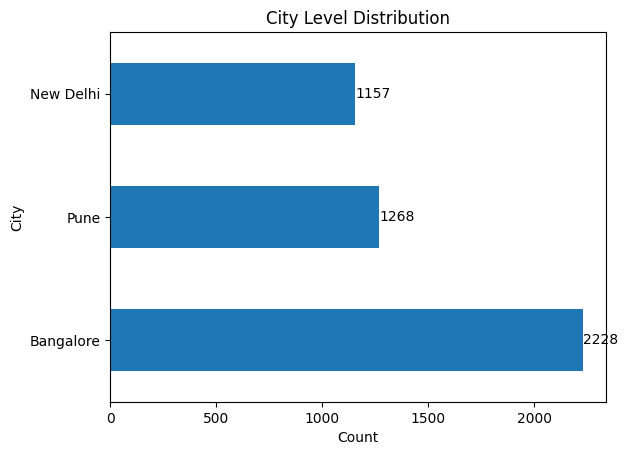

In [19]:
# Assuming df is your DataFrame and 'Education' is a column in it
education_counts = df['City'].value_counts()

# Create a horizontal bar chart
ax = education_counts.plot(kind='barh')

# Add labels to the bars
for i, count in enumerate(education_counts):
    ax.text(count, i, str(count), va='center')

# Set axis labels and the title
plt.xlabel('Count')
plt.ylabel('City')
plt.title('City Level Distribution')

# Show the plot
plt.show()

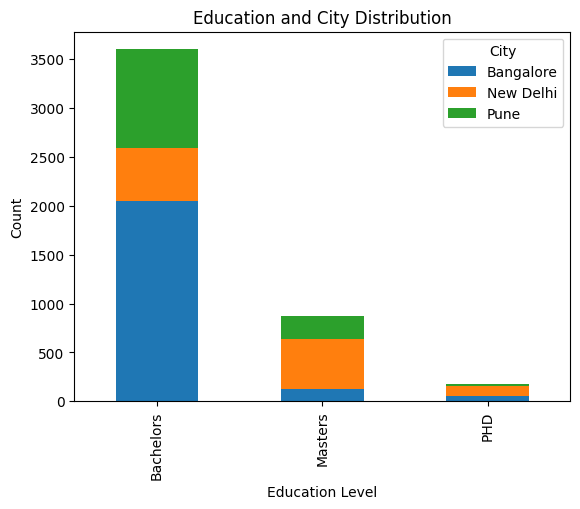

In [22]:
grouped = df.groupby(['Education', 'City']).size().unstack(fill_value=0)

# Create a grouped bar chart
grouped.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education and City Distribution')

# Show the plot
plt.legend(title='City')
plt.show()

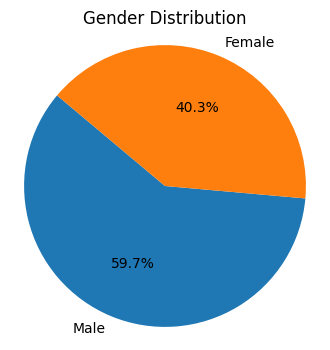

In [33]:
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Gender Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

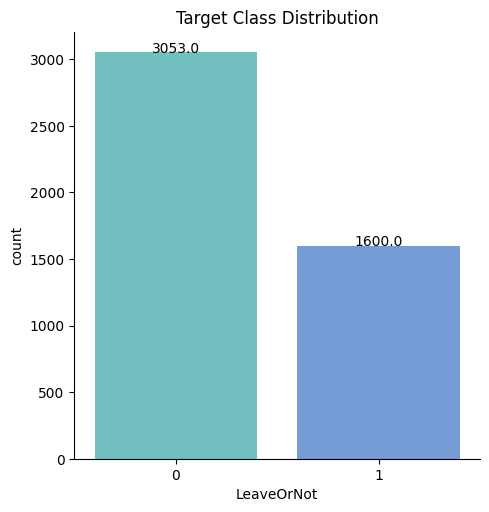

In [41]:
not_leave = df[df['LeaveOrNot'] == 0].shape[0]
leave = df[df['LeaveOrNot'] == 1].shape[0]

# Create a count plot
g = sns.catplot(data=df, x="LeaveOrNot", kind="count", palette="winter_r", alpha=.6)

# Add labels to the bars
ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Set title
plt.title("Target Class Distribution")

# Show the plot
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

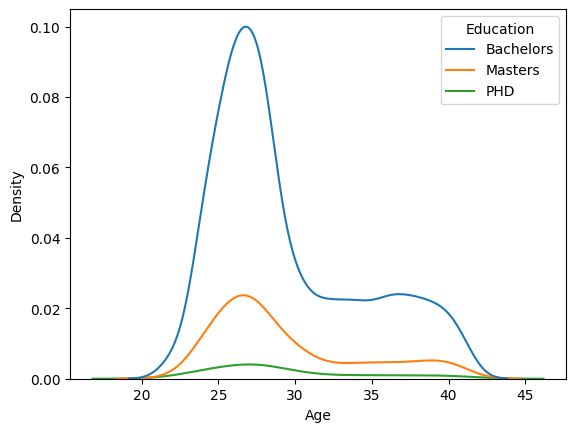

In [48]:
sns.kdeplot(data=df, x='Age', hue='Education')

<Axes: xlabel='Age', ylabel='Density'>

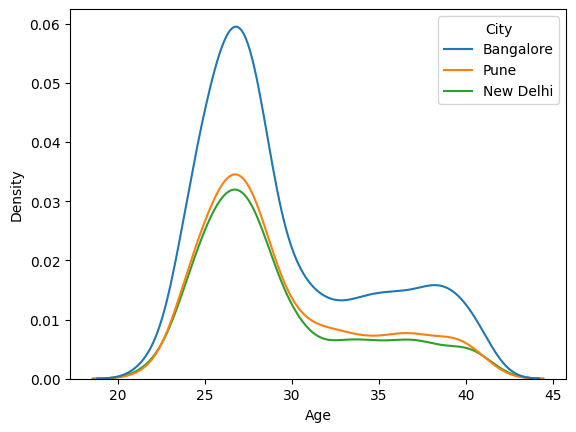

In [49]:
sns.kdeplot(data=df, x='Age',hue='City')

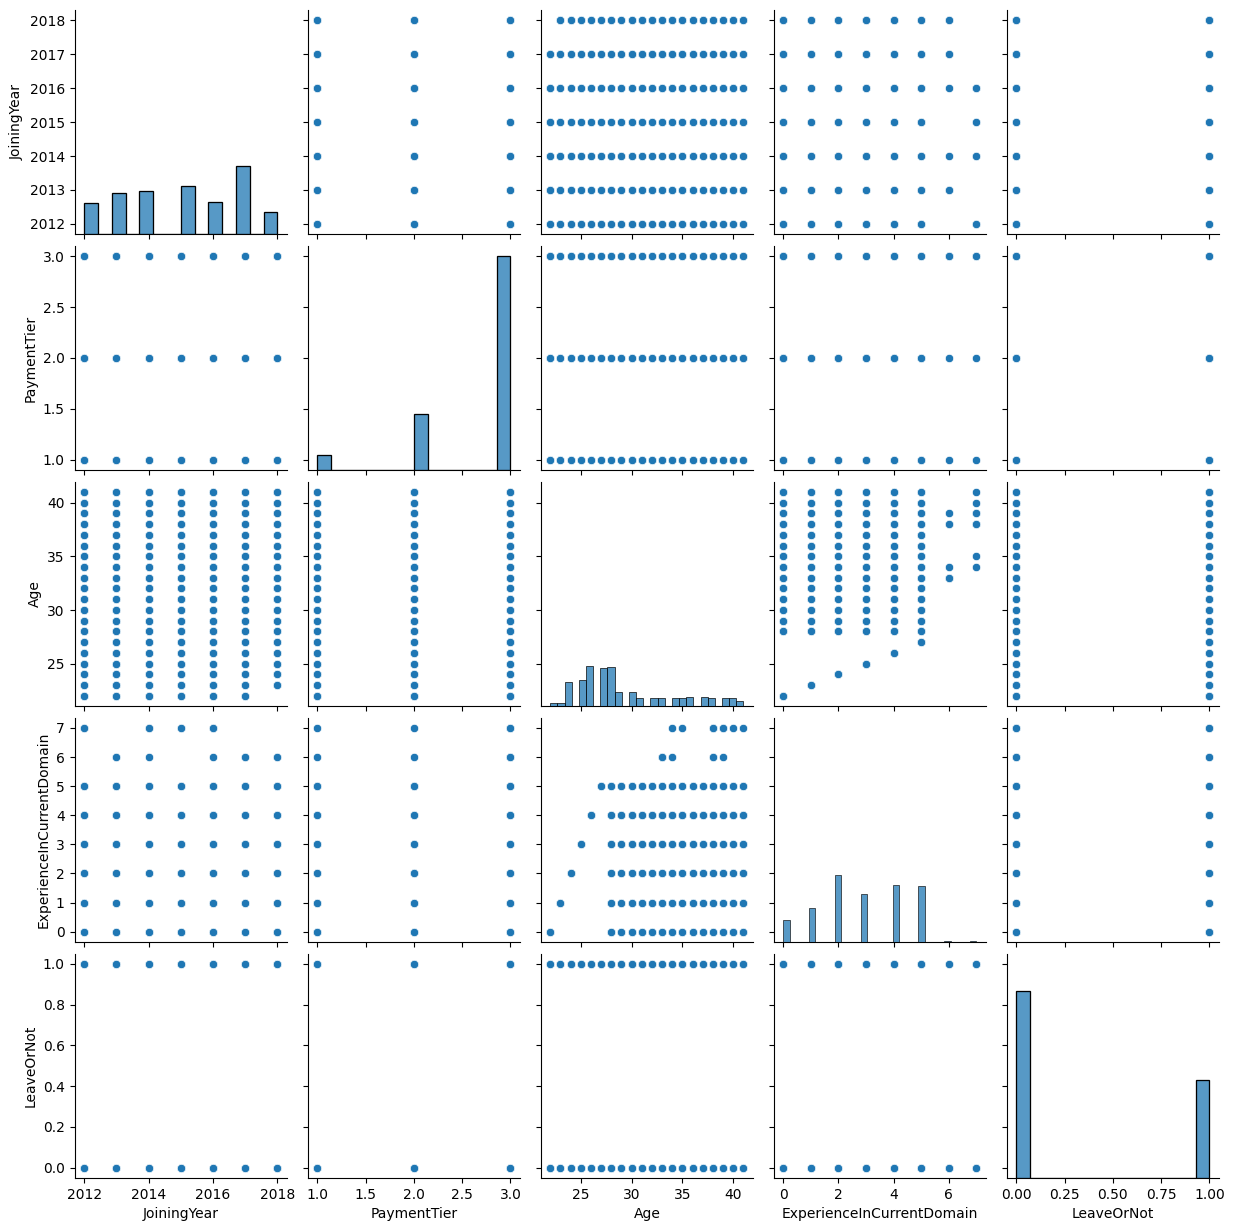

In [46]:
sns.pairplot(df)

<ipython-input-54-3864a689b7fd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
<ipython-input-54-3864a689b7fd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
<ipython-input-54-3864a689b7fd>:6: UserWarning: 

`distplot` is a deprecat

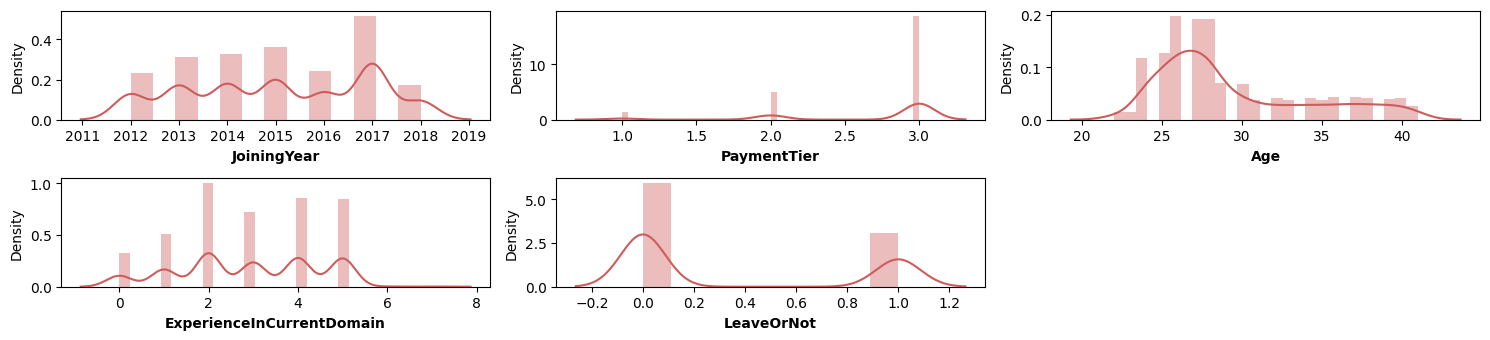

In [54]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()
plt.show();

### Feature Engineering

In [61]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Education' column
df['Education_LabelEncoded'] = label_encoder.fit_transform(df['Education'])


In [65]:
# Apply one-hot encoding on 'City' column
df = pd.get_dummies(df, columns=['City'], prefix=['City'], drop_first=True)

In [67]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) # label encoding on 'Gender'
df['EverBenched'] = df['EverBenched'].map({'No': 0, 'Yes': 1}) # label encoding on 'EverBenched'


In [69]:
df.drop('Education', axis=1, inplace=True)# Drop column

In [76]:
df['City'] = df['City_New Delhi'] | df['City_Pune']

In [78]:
df.drop(['City_New Delhi', 'City_Pune'],axis=1, inplace=True)

In [86]:
df.rename(columns={'Education_LabelEncoded': 'Education'}, inplace=True)
df.rename(columns={'ExperienceInCurrentDomain': 'Experience'}, inplace=True)
df.rename(columns={'LeaveOrNot': 'Target'}, inplace=True)

In [89]:
X = df.drop('Target', axis=1) # Independent
y = df['Target'] # Dependent

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


### Feature Importance

       Feature  Importance
0  JoiningYear    0.346650
2          Age    0.200299
1  PaymentTier    0.137053
6    Education    0.106129
5   Experience    0.088391
3       Gender    0.060183
7         City    0.042277
4  EverBenched    0.019017


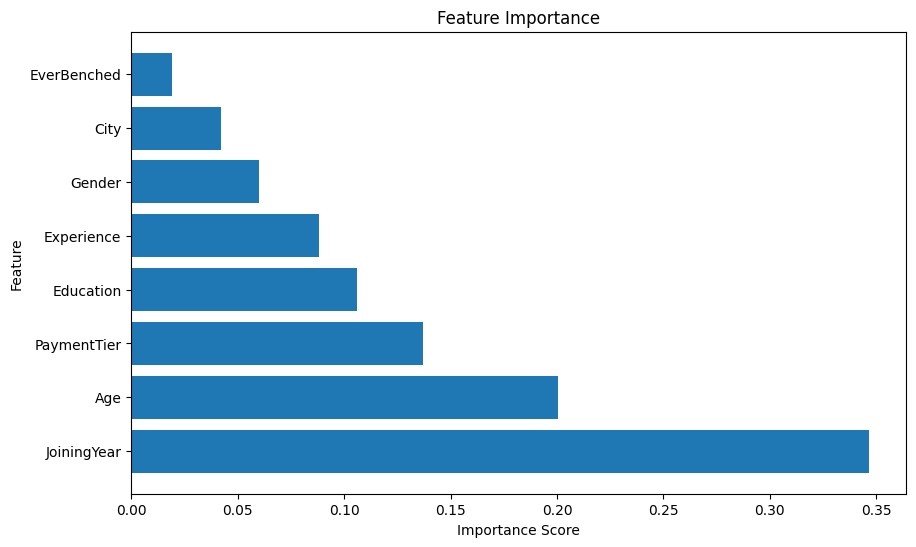

In [93]:
# Apply feature scaling (standardization in this case)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_res, y_res)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_res.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

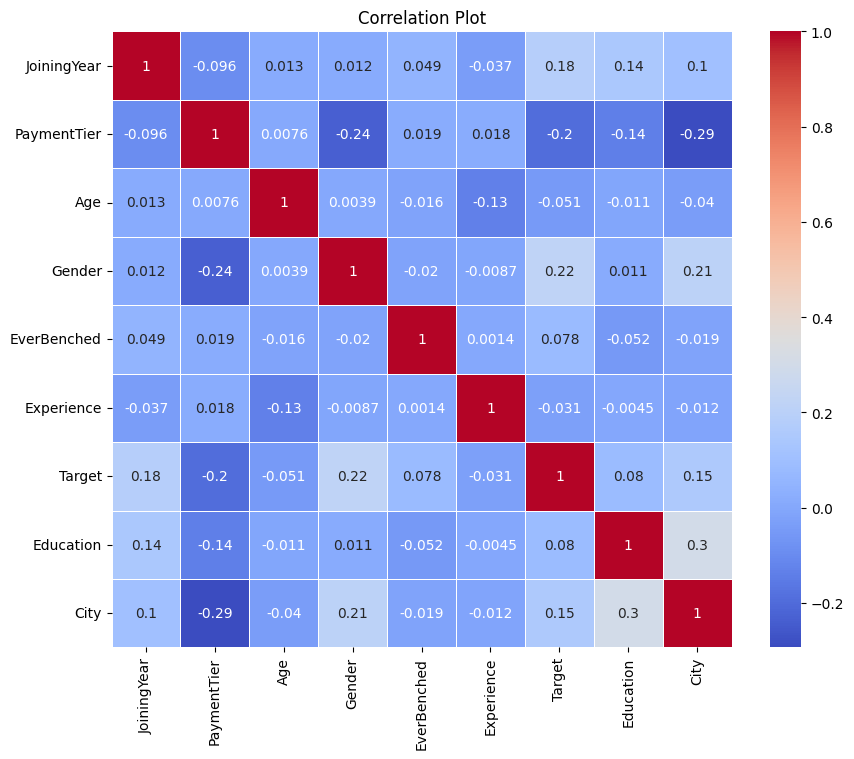

In [94]:
# Assuming df is your DataFrame with numerical columns
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

### Model Training

In [100]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [101]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification

    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [102]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    cost_list=[]
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

    return report

In [103]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [104]:
report = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.8890
- F1 score: 0.8879
- Precision: 0.9001
- Recall: 0.8760
- Roc Auc Score: 0.8891
- COST: 152860.
----------------------------------
Model performance for Test set
- Accuracy: 0.8322
- F1 score: 0.8310
- Precision: 0.8275
- Recall: 0.8344
- Roc Auc Score: 0.8323
- COST: 50540.


Decision Tree
Model performance for Training set
- Accuracy: 0.8890
- F1 score: 0.8855
- Precision: 0.9178
- Recall: 0.8554
- Roc Auc Score: 0.8891
- COST: 177360.
----------------------------------
Model performance for Test set
- Accuracy: 0.8281
- F1 score: 0.8261
- Precision: 0.8261
- Recall: 0.8261
- Roc Auc Score: 0.8281
- COST: 53040.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.7870
- F1 score: 0.7606
- Precision: 0.8713
- Recall: 0.6749
- Roc Auc Score: 0.7873
- COST: 396920.
----------------------------------
Model performance for Test set
- Accuracy: 0.8008
- F1 score: 0.7799
- Precision: 0.8592
- Recall: 0.7140

In [105]:
report

,Model Name,Cost
0,Random Forest,50540
1,Decision Tree,53040
5,XGBClassifier,60860
4,K-Neighbors Classifier,60970
6,CatBoosting Classifier,63220
2,Gradient Boosting,86200
7,AdaBoost Classifier,93570
3,Logistic Regression,133010


In [106]:
# final model
final_model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [107]:
print("Final RandomForest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final RandomForest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final RandomForest Classifier Accuracy Score (Train) : 0.8890495867768595
Final RandomForest Classifier Accuracy Score (Test) : 0.8272727272727273


In [108]:
print("Final RandomForest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))

Final RandomForest Classifier Cost Metric(Test) : 53540


### Hyperparameter Tuning

In [123]:
# parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Model
rf = RandomForestClassifier(random_state=42)
# Gridsearchcv
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [124]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [125]:
print(f"Best Params: {best_params}")
print(f"Best model: {best_model}")

Best Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best model: RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)


In [126]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.2f}')


Best Model Accuracy: 0.84


### Model evaluation

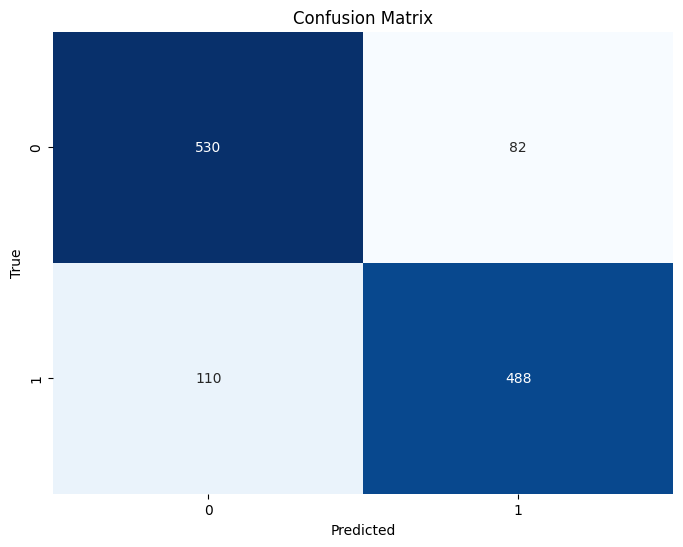

In [127]:

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [128]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       612
           1       0.86      0.82      0.84       598

    accuracy                           0.84      1210
   macro avg       0.84      0.84      0.84      1210
weighted avg       0.84      0.84      0.84      1210



ROC-AUC Score: 0.84


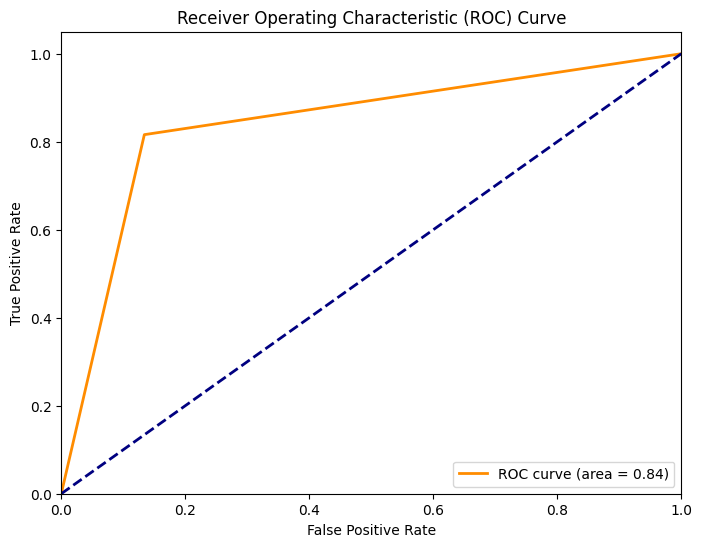

In [129]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Save model

In [130]:
import pickle
# Save the best model to a file in pickle format
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)